In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
engine = create_engine('sqlite:///landon.sqlite')

In [3]:
df = pd.read_sql_table('sales', con = engine.connect())

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   int64  
 1   property_id       5000 non-null   int64  
 2   property_city     5000 non-null   object 
 3   property_state    5000 non-null   object 
 4   product_id        5000 non-null   int64  
 5   product_category  5000 non-null   object 
 6   product_name      5000 non-null   object 
 7   quantity          5000 non-null   int64  
 8   product_price     5000 non-null   float64
 9   order_total       5000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 312.6+ KB


In [5]:
df.dtypes

order_id              int64
property_id           int64
property_city        object
property_state       object
product_id            int64
product_category     object
product_name         object
quantity              int64
product_price       float64
order_total         float64
dtype: object

In [6]:
df.head()

,order_id,property_id,property_city,property_state,product_id,product_category,product_name,quantity,product_price,order_total
0,1,17,Las Vegas,Nevada,41,Furnishings,Office Chair,1,85.0,85.0
1,2,15,Chicago,Illinois,54,Furnishings,Chest of Drawers,2,150.0,300.0
2,3,5,Kansas City,Missouri,71,Maintenance,Hammer,2,17.0,34.0
3,4,19,Los Angeles,California,3,Housekeeping,Washcloth,2,3.0,6.0
4,5,12,Dallas,Texas,45,Furnishings,Computer Desk,3,102.0,306.0


In [7]:
df['property_state'].value_counts()

California       505
Virginia         504
Pennsylvania     272
Missouri         267
Nevada           261
Louisiana        260
Washington       257
Illinois         257
Tennessee        257
Ohio             254
Georgia          253
Texas            252
Florida          238
Massachusetts    237
Colorado         235
Arizona          233
Oregon           231
New York         227
Name: property_state, dtype: int64

In [8]:
df['property_city'].value_counts()

Philadelphia     272
Kansas City      267
Los Angeles      262
Las Vegas        261
New Orleans      260
Nashville        257
Chicago          257
Seattle          257
Richmond         256
Cincinnati       254
Atlanta          253
Dallas           252
Arlington        248
San Francisco    243
Orlando          238
Boston           237
Denver           235
Phoenix          233
Portland         231
New York         227
Name: property_city, dtype: int64

<AxesSubplot:>

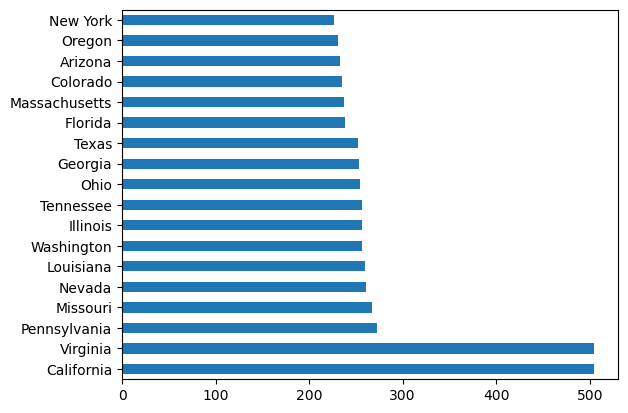

In [9]:
df['property_state'].value_counts().plot(kind = 'barh')

In [10]:
df['product_price'].describe()

count    5000.000000
mean       52.919000
std        57.552297
min         3.000000
25%        17.000000
50%        30.000000
75%        75.000000
max       300.000000
Name: product_price, dtype: float64

<AxesSubplot:xlabel='product_category', ylabel='product_price'>

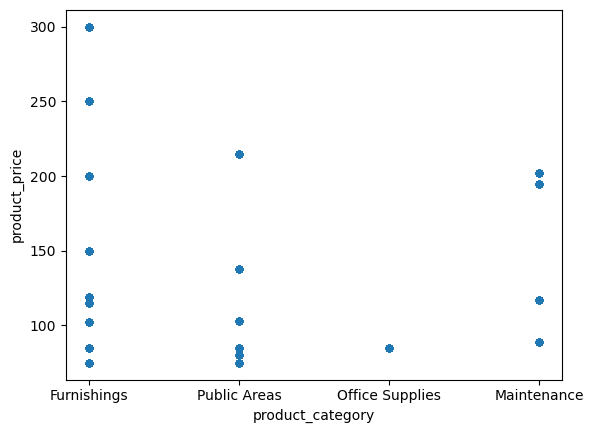

In [11]:
df.loc[df['product_price'] >= 75].plot(kind = 'scatter', x = 'product_category', y = 'product_price') #x and y are labels.

In [12]:
sub = df.loc[df['product_price'] >= 75]

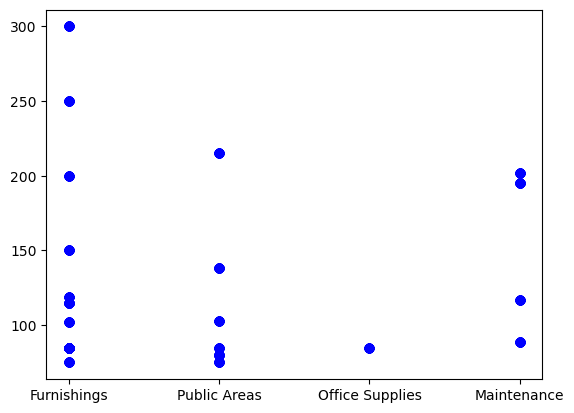

In [13]:
fig, ax = plt.subplots()
ax.scatter(sub['product_category'],sub['product_price'],  color = 'blue')
plt.show()

<AxesSubplot:ylabel='Frequency'>

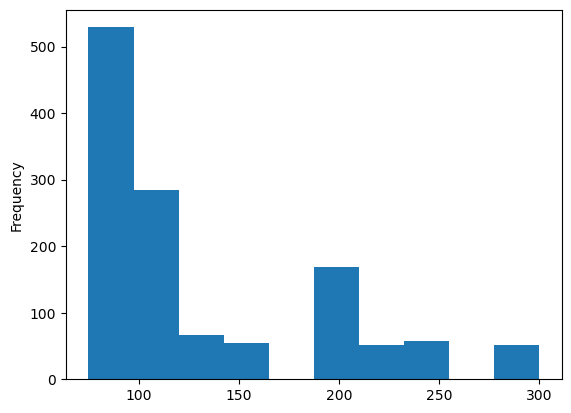

In [14]:
sub['product_price'].plot(kind = 'hist', x = 'product_price')
#to plot the product price distribution.
# Distributions are best plotted with histograms.

In [15]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264 entries, 0 to 4995
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          1264 non-null   int64  
 1   property_id       1264 non-null   int64  
 2   property_city     1264 non-null   object 
 3   property_state    1264 non-null   object 
 4   product_id        1264 non-null   int64  
 5   product_category  1264 non-null   object 
 6   product_name      1264 non-null   object 
 7   quantity          1264 non-null   int64  
 8   product_price     1264 non-null   float64
 9   order_total       1264 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 88.9+ KB


In [16]:
df['property_city'].dtypes

dtype('O')

This is an object type column, thus series.value_counts().plot(kind = 'hist'/'barh') would work for obj cols. As value_counts return an int type.

## Citywise order distribution

<AxesSubplot:title={'center':'Citywise order distribution'}, xlabel='Orders', ylabel='City'>

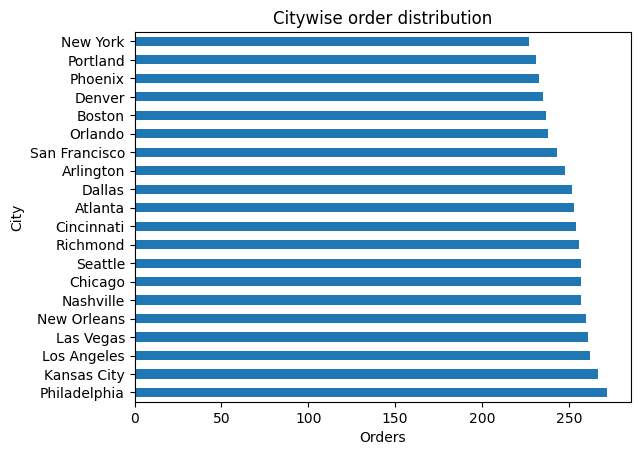

In [17]:
df['property_city'].value_counts().plot(kind = 'barh', ylabel = 'City', xlabel = 'Orders', title = 'Citywise order distribution')

We see Philadelphia, is the city with the highest orders.
Let us now, subset our dataset to include only orders from Philadelphia, such that we are able to visualise which type of product amounts most for these orders.

## Let's find what a city with most orders, orders most out of the product categories.

In [18]:
df['property_city'].value_counts()

Philadelphia     272
Kansas City      267
Los Angeles      262
Las Vegas        261
New Orleans      260
Nashville        257
Chicago          257
Seattle          257
Richmond         256
Cincinnati       254
Atlanta          253
Dallas           252
Arlington        248
San Francisco    243
Orlando          238
Boston           237
Denver           235
Phoenix          233
Portland         231
New York         227
Name: property_city, dtype: int64

In [19]:
sub = df.loc[df['property_city'] == 'Philadelphia']

In [20]:
sub.head()

,order_id,property_id,property_city,property_state,product_id,product_category,product_name,quantity,product_price,order_total
11,12,8,Philadelphia,Pennsylvania,23,Office Supplies,Printer Toner,1,85.0,85.0
20,21,8,Philadelphia,Pennsylvania,57,Furnishings,Wireless Router,3,70.0,210.0
37,38,8,Philadelphia,Pennsylvania,37,Furnishings,Bed (King),3,300.0,900.0
52,53,8,Philadelphia,Pennsylvania,51,Furnishings,Painting,3,85.0,255.0
79,80,8,Philadelphia,Pennsylvania,85,Public Areas,Low Chair,1,80.0,80.0


In [21]:
sub['product_category'].value_counts()

Public Areas       67
Housekeeping       67
Furnishings        64
Maintenance        40
Office Supplies    34
Name: product_category, dtype: int64

It looks like Office Supplies is the least category of products ordered in Philadelphia.

It looks like Philadelphia is a state, mostly interested in spending for public area items such as chairs, housekeeping items such as Washcloth etc.

Which further suggests that Philadelphia is a state, mainly focused on purchases items for domestic non-commercial items for household purposes. 

**Data indicates that this is a bright market for commerce of household items compared with other states.**

Let's plot this for further clarity on this exact inference.

<AxesSubplot:title={'center':"Philadelphia's Orders in Product_Category."}, xlabel='Product Categories', ylabel='Orders'>

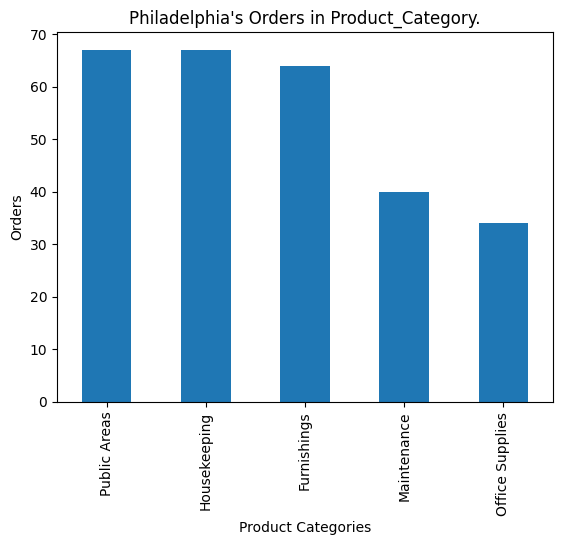

In [22]:
sub['product_category'].value_counts().plot(kind = 'bar', ylabel = 'Orders', xlabel = "Product Categories", title = "Philadelphia's Orders in Product_Category.")
# Use barh for horizontal bar graphs.

We use a bar graph as there are different types of category under the series prod_category.

A bar graph highlights these distinctions clearly, by displaying the amount of orders in each product category.

### Next let us plot the top 5 cities with highest orders.

In [23]:
df['property_city'].value_counts()

Philadelphia     272
Kansas City      267
Los Angeles      262
Las Vegas        261
New Orleans      260
Nashville        257
Chicago          257
Seattle          257
Richmond         256
Cincinnati       254
Atlanta          253
Dallas           252
Arlington        248
San Francisco    243
Orlando          238
Boston           237
Denver           235
Phoenix          233
Portland         231
New York         227
Name: property_city, dtype: int64

<AxesSubplot:title={'center':'Top 5 cities with Highest orders'}>

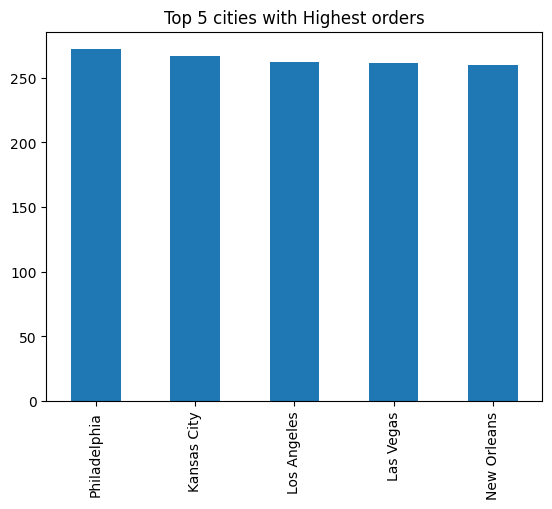

In [24]:
df['property_city'].value_counts().head().plot(kind = 'bar', title = "Top 5 cities with Highest orders")

Let us try to find the product category types these cities ordered by integrating prod_category to the above plot.

In [43]:
top_5_cities = ['Philadelphia' , 'Kansas City', 'Los Angeles','Las Vegas','New Orleans']
top_5_bool = df['property_city'].value_counts().head(10)

In [44]:
top_5_bool

Philadelphia    272
Kansas City     267
Los Angeles     262
Las Vegas       261
New Orleans     260
Nashville       257
Chicago         257
Seattle         257
Richmond        256
Cincinnati      254
Name: property_city, dtype: int64

In [45]:
top_5_bool.sort_values()

Cincinnati      254
Richmond        256
Nashville       257
Chicago         257
Seattle         257
New Orleans     260
Las Vegas       261
Los Angeles     262
Kansas City     267
Philadelphia    272
Name: property_city, dtype: int64

In [36]:
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          5000 non-null   int64  
 1   property_id       5000 non-null   int64  
 2   property_city     5000 non-null   object 
 3   property_state    5000 non-null   object 
 4   product_id        5000 non-null   int64  
 5   product_category  5000 non-null   object 
 6   product_name      5000 non-null   object 
 7   quantity          5000 non-null   int64  
 8   product_price     5000 non-null   float64
 9   order_total       5000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 312.6+ KB


Use tablaeu to find top product categories purchased by top 5 cities.

([<matplotlib.patches.Wedge at 0x7785240>,
 [Text(1.041258082352881, 0.3546570257795568, 'Philadelphia'),
  Text(0.6138152907341113, 0.912814761526674, 'Kansas City'),
  Text(-0.05109431193441396, 1.0988127098318208, 'Los Angeles'),
  Text(-0.689687139252205, 0.8569315316582239, 'Las Vegas'),
  Text(-1.06179919181088, 0.2873716692190836, 'New Orleans'),
  Text(-1.0296182599771198, -0.38715144158544557, 'Nashville'),
  Text(-0.6127131503558996, -0.9135549219291356, 'Chicago'),
  Text(0.03252153748181319, -1.09951914471728, 'Seattle'),
  Text(0.6645795303793463, -0.8765466603671294, 'Richmond'),
  Text(1.0487164876651047, -0.33195440726004305, 'Cincinnati')])

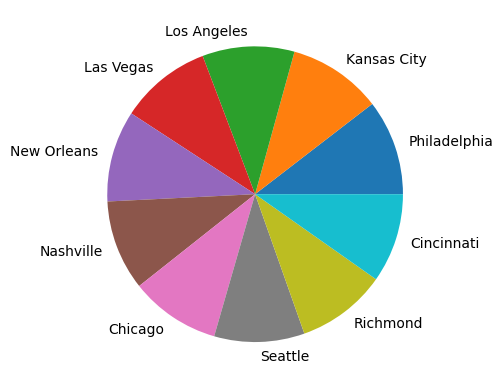

In [47]:
plt.pie(df['property_city'].value_counts().head(10), labels = df['property_city'].value_counts().head(10).index.tolist())